Step 0. Unzip enron1.zip into the current directory.

Step 1. Traverse the dataset and create a Pandas dataframe. This is already done for you and should run without any errors.

In [1]:
import pandas as pd
import os

def read_spam():
    category = 'spam'
    directory = './enron1/spam'
    return read_category(category, directory)

def read_ham():
    category = 'ham'
    directory = './enron1/ham'
    return read_category(category, directory)

def read_category(category, directory):
    emails = []
    for filename in os.listdir(directory):
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(directory, filename), 'r') as fp:
            try:
                content = fp.read()
                emails.append({'name': filename, 'content': content, 'category': category})
            except:
                print(f'skipped {filename}')
    return emails

ham = read_ham()
spam = read_spam()

df = pd.DataFrame.from_records(ham)
df = pd.concat([df, pd.DataFrame.from_records(spam)], ignore_index=True)

skipped 2248.2004-09-23.GP.spam.txt
skipped 2526.2004-10-17.GP.spam.txt
skipped 2698.2004-10-31.GP.spam.txt
skipped 4566.2005-05-24.GP.spam.txt


Step 2. Data cleaning is a critical part of machine learning. You and I can recognize that 'Hello' and 'hello' are the same word but a machine does not know this a priori. Therefore, we can 'help' the machine by conducting such normalization steps for it. Write a function `preprocessor` that takes in a string and replaces all non alphabet characters with a space and then lowercases the result.

In [10]:
import re

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text
    
df['content'] = df['content'].apply(clean_text)

Step 3. We will now train the machine learning model with Logistic Regression.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Instantiate and fit a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Generate predictions on the test set
predictions = logreg.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.962536023054755
Confusion Matrix:
 [[382  26]
 [  0 286]]
Classification Report:
               precision    recall  f1-score   support

         ham       1.00      0.94      0.97       408
        spam       0.92      1.00      0.96       286

    accuracy                           0.96       694
   macro avg       0.96      0.97      0.96       694
weighted avg       0.97      0.96      0.96       694



Step 4.  Finding Top 10 Words Used in Spam Emails

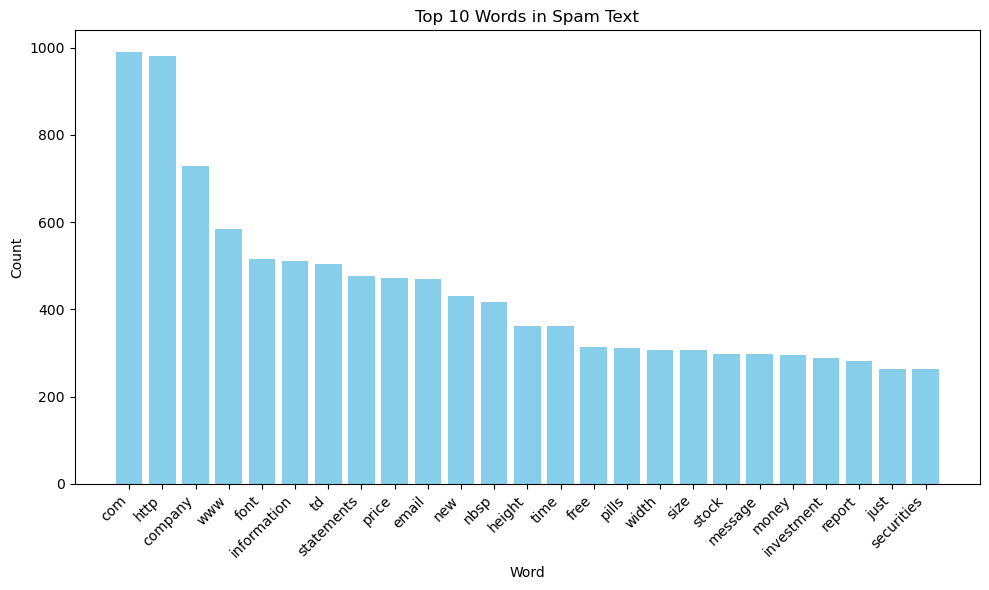

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
spam_text = ' '.join(df[df['category'] == "spam"]['content'].str.replace('subject', ''))
vectorizer = CountVectorizer(stop_words='english',)
word_counts = vectorizer.fit_transform([spam_text])
unique_words = vectorizer.get_feature_names_out()
word_counts = word_counts.toarray()[0]
word_count_df = pd.DataFrame({'Word': unique_words, 'Count': word_counts}).sort_values(by='Count', ascending=False)
# Select the top 10 words
top_words_df = word_count_df.head(25)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 Words in Spam Text')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

All Done!